In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score
from interpret.glassbox import ExplainableBoostingClassifier
import matplotlib.pyplot as plt

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
df=pd.read_csv("pd_speech_features.csv")

In [10]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [11]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [12]:
X=df.drop(columns=['class'])

In [13]:
y=df['class']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
xgb=XGBClassifier()

In [16]:
xgb.fit(X_train,y_train)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[06:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Accuracy:  0.8618421052631579
F1 Score:  0.9106382978723405
Precision:  0.8842975206611571


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Recall (Sensitivity):  0.9385964912280702
Specificity:  0.631578947368421


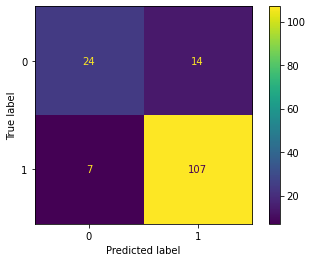

In [18]:
print("Accuracy: ",accuracy_score(y_test,xgb.predict(X_test)))
print("F1 Score: ",f1_score(y_test,xgb.predict(X_test)))
print("Precision: ",precision_score(y_test,xgb.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,xgb.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [19]:
rfr=RandomForestClassifier()

In [20]:
rfr.fit(X_train,y_train)

RandomForestClassifier()

Accuracy:  0.881578947368421
F1 Score:  0.9256198347107438
Precision:  0.875
Recall (Sensitivity):  0.9824561403508771
Specificity:  0.5789473684210527


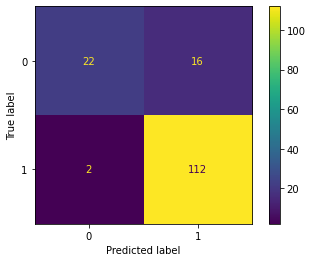

In [21]:
print("Accuracy: ",accuracy_score(y_test,rfr.predict(X_test)))
print("F1 Score: ",f1_score(y_test,rfr.predict(X_test)))
print("Precision: ",precision_score(y_test,rfr.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,rfr.predict(X_test)))


cm=confusion_matrix(y_test,rfr.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


Accuracy:  0.881578947368421
F1 Score:  0.9256198347107438
Precision:  0.875
Recall (Sensitivity):  0.9824561403508771
Specificity:  0.5789473684210527


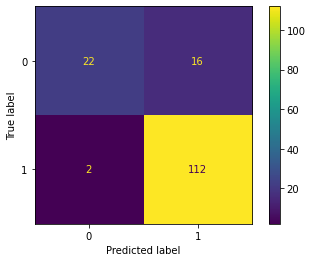

In [22]:
ebm=ExplainableBoostingClassifier()
ebm.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,ebm.predict(X_test)))
print("F1 Score: ",f1_score(y_test,ebm.predict(X_test)))
print("Precision: ",precision_score(y_test,ebm.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,ebm.predict(X_test)))


cm=confusion_matrix(y_test,ebm.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [23]:
from interpret import show
show(ebm.explain_global())


<!-- http://127.0.0.1:7001/2096775828000/ -->

In [24]:
fic=list(rfr.feature_importances_)

In [25]:
import matplotlib.pyplot as plt

<BarContainer object of 754 artists>

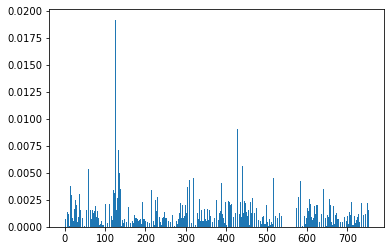

In [26]:
plt.bar([i for i in range(len(df.columns)-1)],fic)

In [27]:
len(fic)==len(df.columns)

False

In [28]:
print('[',end='')
for i in range(len(fic)):
    if fic[i]<=0.0025:
        print(f"'{df.columns[i]}'",end=" ,")
print(']',end='')

['id' ,'gender' ,'PPE' ,'DFA' ,'RPDE' ,'numPulses' ,'numPeriodsPulses' ,'meanPeriodPulses' ,'stdDevPeriodPulses' ,'locPctJitter' ,'locAbsJitter' ,'rapJitter' ,'ppq5Jitter' ,'locDbShimmer' ,'apq3Shimmer' ,'apq11Shimmer' ,'ddaShimmer' ,'meanAutoCorrHarmonicity' ,'meanNoiseToHarmHarmonicity' ,'meanHarmToNoiseHarmonicity' ,'minIntensity' ,'maxIntensity' ,'meanIntensity' ,'f1' ,'f2' ,'f3' ,'f4' ,'b1' ,'b2' ,'b3' ,'b4' ,'GQ_prc5_95' ,'GQ_std_cycle_closed' ,'GNE_std' ,'GNE_SNR_TKEO' ,'GNE_SNR_SEO' ,'GNE_NSR_TKEO' ,'GNE_NSR_SEO' ,'VFER_mean' ,'VFER_std' ,'VFER_entropy' ,'VFER_SNR_TKEO' ,'VFER_SNR_SEO' ,'VFER_NSR_TKEO' ,'VFER_NSR_SEO' ,'IMF_SNR_SEO' ,'IMF_SNR_TKEO' ,'IMF_SNR_entropy' ,'IMF_NSR_SEO' ,'IMF_NSR_TKEO' ,'IMF_NSR_entropy' ,'mean_Log_energy' ,'mean_MFCC_0th_coef' ,'mean_MFCC_1st_coef' ,'mean_MFCC_3rd_coef' ,'mean_MFCC_4th_coef' ,'mean_MFCC_5th_coef' ,'mean_MFCC_6th_coef' ,'mean_MFCC_7th_coef' ,'mean_MFCC_8th_coef' ,'mean_MFCC_9th_coef' ,'mean_MFCC_10th_coef' ,'mean_MFCC_11th_coef' ,'m

In [29]:
important=['gender' ,'PPE' ,'DFA' ,'RPDE' ,'numPulses' ,'numPeriodsPulses' ,'meanPeriodPulses' ,'locPctJitter' ,'ppq5Jitter' ,'locShimmer' ,'apq3Shimmer' ,'apq5Shimmer' ,'apq11Shimmer' ,'ddaShimmer' ,'meanAutoCorrHarmonicity' ,'meanNoiseToHarmHarmonicity' ,'meanHarmToNoiseHarmonicity' ,'minIntensity' ,'maxIntensity' ,'meanIntensity' ,'f1' ,'f2' ,'f3' ,'f4' ,'b1' ,'b2' ,'b3' ,'b4' ,'GQ_prc5_95' ,'GQ_std_cycle_closed' ,'GNE_mean' ,'GNE_std' ,'GNE_SNR_TKEO' ,'GNE_SNR_SEO' ,'GNE_NSR_TKEO' ,'GNE_NSR_SEO' ,'VFER_mean' ,'VFER_std' ,'VFER_entropy' ,'VFER_SNR_TKEO' ,'VFER_SNR_SEO' ,'VFER_NSR_TKEO' ,'VFER_NSR_SEO' ,'IMF_SNR_SEO' ,'IMF_SNR_TKEO' ,'IMF_SNR_entropy' ,'IMF_NSR_SEO' ,'IMF_NSR_TKEO' ,'IMF_NSR_entropy' ,'mean_Log_energy' ,'mean_MFCC_0th_coef' ,'mean_MFCC_1st_coef' ,'mean_MFCC_5th_coef' ,'mean_MFCC_6th_coef' ,'mean_MFCC_7th_coef' ,'mean_MFCC_8th_coef' ,'mean_MFCC_9th_coef' ,'mean_MFCC_10th_coef' ,'mean_MFCC_11th_coef' ,'mean_MFCC_12th_coef' ,'mean_delta_log_energy' ,'mean_0th_delta' ,'mean_1st_delta' ,'mean_2nd_delta' ,'mean_3rd_delta' ,'mean_4th_delta' ,'mean_5th_delta' ,'mean_6th_delta' ,'mean_7th_delta' ,'mean_8th_delta' ,'mean_9th_delta' ,'mean_10th_delta' ,'mean_11th_delta' ,'mean_12th_delta' ,'mean_delta_delta_log_energy' ,'mean_delta_delta_0th' ,'mean_1st_delta_delta' ,'mean_2nd_delta_delta' ,'mean_3rd_delta_delta' ,'mean_4th_delta_delta' ,'mean_5th_delta_delta' ,'mean_6th_delta_delta' ,'mean_7th_delta_delta' ,'mean_8th_delta_delta' ,'mean_9th_delta_delta' ,'mean_10th_delta_delta' ,'mean_11th_delta_delta' ,'mean_12th_delta_delta' ,'std_MFCC_0th_coef' ,'std_MFCC_1st_coef' ,'std_MFCC_2nd_coef' ,'std_MFCC_3rd_coef' ,'std_MFCC_4th_coef' ,'std_MFCC_5th_coef' ,'std_MFCC_6th_coef' ,'std_MFCC_7th_coef' ,'std_MFCC_8th_coef' ,'std_MFCC_9th_coef' ,'std_MFCC_10th_coef' ,'std_MFCC_11th_coef' ,'std_0th_delta' ,'std_1st_delta' ,'std_2nd_delta' ,'std_3rd_delta' ,'std_4th_delta' ,'std_5th_delta' ,'std_12th_delta' ,'std_delta_delta_0th' ,'std_1st_delta_delta' ,'std_2nd_delta_delta' ,'std_3rd_delta_delta' ,'std_5th_delta_delta' ,'Ea' ,'Ed_1_coef' ,'Ed_2_coef' ,'Ed_3_coef' ,'Ed_4_coef' ,'Ed_5_coef' ,'Ed_6_coef' ,'Ed_7_coef' ,'Ed_8_coef' ,'Ed_9_coef' ,'Ed_10_coef' ,'det_entropy_shannon_1_coef' ,'det_entropy_shannon_2_coef' ,'det_entropy_shannon_3_coef' ,'det_entropy_shannon_4_coef' ,'det_entropy_shannon_5_coef' ,'det_entropy_shannon_6_coef' ,'det_entropy_shannon_7_coef' ,'det_entropy_shannon_8_coef' ,'det_entropy_shannon_9_coef' ,'det_entropy_shannon_10_coef' ,'det_entropy_log_1_coef' ,'det_entropy_log_2_coef' ,'det_entropy_log_3_coef' ,'det_entropy_log_4_coef' ,'det_entropy_log_5_coef' ,'det_entropy_log_6_coef' ,'det_entropy_log_7_coef' ,'det_entropy_log_8_coef' ,'det_entropy_log_9_coef' ,'det_entropy_log_10_coef' ,'det_TKEO_mean_1_coef' ,'det_TKEO_mean_2_coef' ,'det_TKEO_mean_3_coef' ,'det_TKEO_mean_4_coef' ,'det_TKEO_mean_5_coef' ,'det_TKEO_mean_6_coef' ,'det_TKEO_mean_7_coef' ,'det_TKEO_mean_8_coef' ,'det_TKEO_mean_9_coef' ,'det_TKEO_mean_10_coef' ,'det_TKEO_std_1_coef' ,'det_TKEO_std_2_coef' ,'det_TKEO_std_3_coef' ,'det_TKEO_std_4_coef' ,'det_TKEO_std_5_coef' ,'det_TKEO_std_6_coef' ,'det_TKEO_std_7_coef' ,'det_TKEO_std_8_coef' ,'det_TKEO_std_9_coef' ,'det_TKEO_std_10_coef' ,'app_entropy_shannon_1_coef' ,'app_entropy_shannon_3_coef' ,'app_entropy_shannon_4_coef' ,'app_entropy_shannon_5_coef' ,'app_entropy_shannon_6_coef' ,'app_entropy_shannon_8_coef' ,'app_entropy_shannon_9_coef' ,'app_entropy_log_1_coef' ,'app_entropy_log_2_coef' ,'app_entropy_log_3_coef' ,'app_entropy_log_4_coef' ,'app_entropy_log_5_coef' ,'app_entropy_log_6_coef' ,'app_entropy_log_7_coef' ,'app_entropy_log_8_coef' ,'app_entropy_log_9_coef' ,'app_entropy_log_10_coef' ,'app_det_TKEO_mean_1_coef' ,'app_det_TKEO_mean_2_coef' ,'app_det_TKEO_mean_3_coef' ,'app_det_TKEO_mean_5_coef' ,'app_det_TKEO_mean_6_coef' ,'app_det_TKEO_mean_7_coef' ,'app_det_TKEO_mean_8_coef' ,'app_det_TKEO_mean_10_coef' ,'app_TKEO_std_1_coef' ,'app_TKEO_std_2_coef' ,'app_TKEO_std_3_coef' ,'app_TKEO_std_5_coef' ,'app_TKEO_std_6_coef' ,'app_TKEO_std_10_coef' ,'Ea2' ,'Ed2_1_coef' ,'Ed2_2_coef' ,'Ed2_3_coef' ,'Ed2_4_coef' ,'Ed2_5_coef' ,'Ed2_6_coef' ,'Ed2_7_coef' ,'Ed2_8_coef' ,'Ed2_9_coef' ,'Ed2_10_coef' ,'det_LT_entropy_shannon_1_coef' ,'det_LT_entropy_shannon_2_coef' ,'det_LT_entropy_shannon_3_coef' ,'det_LT_entropy_shannon_4_coef' ,'det_LT_entropy_shannon_5_coef' ,'det_LT_entropy_shannon_6_coef' ,'det_LT_entropy_shannon_7_coef' ,'det_LT_entropy_shannon_8_coef' ,'det_LT_entropy_shannon_9_coef' ,'det_LT_entropy_shannon_10_coef' ,'det_LT_entropy_log_1_coef' ,'det_LT_entropy_log_2_coef' ,'det_LT_entropy_log_3_coef' ,'det_LT_entropy_log_4_coef' ,'det_LT_entropy_log_5_coef' ,'det_LT_entropy_log_6_coef' ,'det_LT_entropy_log_7_coef' ,'det_LT_entropy_log_8_coef' ,'det_LT_entropy_log_9_coef' ,'det_LT_entropy_log_10_coef' ,'det_LT_TKEO_mean_1_coef' ,'det_LT_TKEO_mean_2_coef' ,'det_LT_TKEO_mean_3_coef' ,'det_LT_TKEO_mean_4_coef' ,'det_LT_TKEO_mean_5_coef' ,'det_LT_TKEO_mean_6_coef' ,'det_LT_TKEO_mean_7_coef' ,'det_LT_TKEO_mean_8_coef' ,'det_LT_TKEO_mean_9_coef' ,'det_LT_TKEO_mean_10_coef' ,'det_LT_TKEO_std_1_coef' ,'det_LT_TKEO_std_2_coef' ,'det_LT_TKEO_std_3_coef' ,'det_LT_TKEO_std_4_coef' ,'det_LT_TKEO_std_5_coef' ,'det_LT_TKEO_std_6_coef' ,'det_LT_TKEO_std_7_coef' ,'det_LT_TKEO_std_8_coef' ,'det_LT_TKEO_std_9_coef' ,'det_LT_TKEO_std_10_coef' ,'app_LT_entropy_shannon_1_coef' ,'app_LT_entropy_shannon_2_coef' ,'app_LT_entropy_shannon_3_coef' ,'app_LT_entropy_shannon_4_coef' ,'app_LT_entropy_shannon_5_coef' ,'app_LT_entropy_shannon_6_coef' ,'app_LT_entropy_shannon_7_coef' ,'app_LT_entropy_shannon_8_coef' ,'app_LT_entropy_shannon_9_coef' ,'app_LT_entropy_shannon_10_coef' ,'app_LT_entropy_log_1_coef' ,'app_LT_entropy_log_2_coef' ,'app_LT_entropy_log_3_coef' ,'app_LT_entropy_log_4_coef' ,'app_LT_entropy_log_5_coef' ,'app_LT_entropy_log_7_coef' ,'app_LT_entropy_log_8_coef' ,'app_LT_entropy_log_10_coef' ,'app_LT_TKEO_mean_1_coef' ,'app_LT_TKEO_mean_2_coef' ,'app_LT_TKEO_mean_3_coef' ,'app_LT_TKEO_mean_4_coef' ,'app_LT_TKEO_mean_5_coef' ,'app_LT_TKEO_mean_7_coef' ,'app_LT_TKEO_mean_8_coef' ,'app_LT_TKEO_mean_9_coef' ,'app_LT_TKEO_mean_10_coef' ,'app_LT_TKEO_std_1_coef' ,'app_LT_TKEO_std_2_coef' ,'app_LT_TKEO_std_3_coef' ,'app_LT_TKEO_std_4_coef' ,'app_LT_TKEO_std_6_coef' ,'app_LT_TKEO_std_7_coef' ,'app_LT_TKEO_std_10_coef' ,'tqwt_energy_dec_1' ,'tqwt_energy_dec_2' ,'tqwt_energy_dec_3' ,'tqwt_energy_dec_4' ,'tqwt_energy_dec_5' ,'tqwt_energy_dec_7' ,'tqwt_energy_dec_8' ,'tqwt_energy_dec_10' ,'tqwt_energy_dec_13' ,'tqwt_energy_dec_14' ,'tqwt_energy_dec_15' ,'tqwt_energy_dec_16' ,'tqwt_energy_dec_17' ,'tqwt_energy_dec_19' ,'tqwt_energy_dec_20' ,'tqwt_energy_dec_21' ,'tqwt_energy_dec_22' ,'tqwt_energy_dec_23' ,'tqwt_energy_dec_24' ,'tqwt_energy_dec_25' ,'tqwt_energy_dec_26' ,'tqwt_energy_dec_27' ,'tqwt_energy_dec_29' ,'tqwt_energy_dec_30' ,'tqwt_energy_dec_31' ,'tqwt_energy_dec_32' ,'tqwt_energy_dec_33' ,'tqwt_energy_dec_34' ,'tqwt_energy_dec_35' ,'tqwt_energy_dec_36' ,'tqwt_entropy_shannon_dec_1' ,'tqwt_entropy_shannon_dec_2' ,'tqwt_entropy_shannon_dec_3' ,'tqwt_entropy_shannon_dec_4' ,'tqwt_entropy_shannon_dec_5' ,'tqwt_entropy_shannon_dec_6' ,'tqwt_entropy_shannon_dec_8' ,'tqwt_entropy_shannon_dec_9' ,'tqwt_entropy_shannon_dec_10' ,'tqwt_entropy_shannon_dec_13' ,'tqwt_entropy_shannon_dec_14' ,'tqwt_entropy_shannon_dec_15' ,'tqwt_entropy_shannon_dec_16' ,'tqwt_entropy_shannon_dec_17' ,'tqwt_entropy_shannon_dec_18' ,'tqwt_entropy_shannon_dec_20' ,'tqwt_entropy_shannon_dec_21' ,'tqwt_entropy_shannon_dec_22' ,'tqwt_entropy_shannon_dec_23' ,'tqwt_entropy_shannon_dec_24' ,'tqwt_entropy_shannon_dec_25' ,'tqwt_entropy_shannon_dec_26' ,'tqwt_entropy_shannon_dec_27' ,'tqwt_entropy_shannon_dec_28' ,'tqwt_entropy_shannon_dec_29' ,'tqwt_entropy_shannon_dec_30' ,'tqwt_entropy_shannon_dec_31' ,'tqwt_entropy_shannon_dec_34' ,'tqwt_entropy_shannon_dec_35' ,'tqwt_entropy_log_dec_1' ,'tqwt_entropy_log_dec_2' ,'tqwt_entropy_log_dec_3' ,'tqwt_entropy_log_dec_4' ,'tqwt_entropy_log_dec_5' ,'tqwt_entropy_log_dec_6' ,'tqwt_entropy_log_dec_7' ,'tqwt_entropy_log_dec_8' ,'tqwt_entropy_log_dec_9' ,'tqwt_entropy_log_dec_10' ,'tqwt_entropy_log_dec_12' ,'tqwt_entropy_log_dec_14' ,'tqwt_entropy_log_dec_15' ,'tqwt_entropy_log_dec_16' ,'tqwt_entropy_log_dec_17' ,'tqwt_entropy_log_dec_18' ,'tqwt_entropy_log_dec_19' ,'tqwt_entropy_log_dec_20' ,'tqwt_entropy_log_dec_21' ,'tqwt_entropy_log_dec_22' ,'tqwt_entropy_log_dec_23' ,'tqwt_entropy_log_dec_24' ,'tqwt_entropy_log_dec_25' ,'tqwt_entropy_log_dec_26' ,'tqwt_entropy_log_dec_27' ,'tqwt_entropy_log_dec_29' ,'tqwt_entropy_log_dec_30' ,'tqwt_entropy_log_dec_31' ,'tqwt_entropy_log_dec_32' ,'tqwt_entropy_log_dec_34' ,'tqwt_entropy_log_dec_36' ,'tqwt_TKEO_mean_dec_1' ,'tqwt_TKEO_mean_dec_2' ,'tqwt_TKEO_mean_dec_3' ,'tqwt_TKEO_mean_dec_4' ,'tqwt_TKEO_mean_dec_5' ,'tqwt_TKEO_mean_dec_7' ,'tqwt_TKEO_mean_dec_8' ,'tqwt_TKEO_mean_dec_9' ,'tqwt_TKEO_mean_dec_10' ,'tqwt_TKEO_mean_dec_15' ,'tqwt_TKEO_mean_dec_16' ,'tqwt_TKEO_mean_dec_17' ,'tqwt_TKEO_mean_dec_18' ,'tqwt_TKEO_mean_dec_19' ,'tqwt_TKEO_mean_dec_20' ,'tqwt_TKEO_mean_dec_21' ,'tqwt_TKEO_mean_dec_22' ,'tqwt_TKEO_mean_dec_23' ,'tqwt_TKEO_mean_dec_24' ,'tqwt_TKEO_mean_dec_25' ,'tqwt_TKEO_mean_dec_26' ,'tqwt_TKEO_mean_dec_27' ,'tqwt_TKEO_mean_dec_28' ,'tqwt_TKEO_mean_dec_29' ,'tqwt_TKEO_mean_dec_30' ,'tqwt_TKEO_mean_dec_31' ,'tqwt_TKEO_mean_dec_32' ,'tqwt_TKEO_mean_dec_34' ,'tqwt_TKEO_mean_dec_35' ,'tqwt_TKEO_std_dec_1' ,'tqwt_TKEO_std_dec_2' ,'tqwt_TKEO_std_dec_3' ,'tqwt_TKEO_std_dec_4' ,'tqwt_TKEO_std_dec_5' ,'tqwt_TKEO_std_dec_7' ,'tqwt_TKEO_std_dec_8' ,'tqwt_TKEO_std_dec_9' ,'tqwt_TKEO_std_dec_10' ,'tqwt_TKEO_std_dec_12' ,'tqwt_TKEO_std_dec_13' ,'tqwt_TKEO_std_dec_14' ,'tqwt_TKEO_std_dec_15' ,'tqwt_TKEO_std_dec_16' ,'tqwt_TKEO_std_dec_17' ,'tqwt_TKEO_std_dec_18' ,'tqwt_TKEO_std_dec_19' ,'tqwt_TKEO_std_dec_20' ,'tqwt_TKEO_std_dec_21' ,'tqwt_TKEO_std_dec_22' ,'tqwt_TKEO_std_dec_23' ,'tqwt_TKEO_std_dec_24' ,'tqwt_TKEO_std_dec_25' ,'tqwt_TKEO_std_dec_26','tqwt_TKEO_std_dec_27' ,'tqwt_TKEO_std_dec_28' ,'tqwt_TKEO_std_dec_29' ,'tqwt_TKEO_std_dec_30' ,'tqwt_TKEO_std_dec_31' ,'tqwt_TKEO_std_dec_32' ,'tqwt_TKEO_std_dec_33' ,'tqwt_TKEO_std_dec_34' ,'tqwt_TKEO_std_dec_35' ,'tqwt_TKEO_std_dec_36' ,'tqwt_medianValue_dec_1' ,'tqwt_medianValue_dec_2' ,'tqwt_medianValue_dec_3' ,'tqwt_medianValue_dec_4' ,'tqwt_medianValue_dec_5' ,'tqwt_medianValue_dec_6' ,'tqwt_medianValue_dec_7' ,'tqwt_medianValue_dec_8' ,'tqwt_medianValue_dec_9' ,'tqwt_medianValue_dec_10' ,'tqwt_medianValue_dec_11' ,'tqwt_medianValue_dec_12' ,'tqwt_medianValue_dec_13' ,'tqwt_medianValue_dec_14' ,'tqwt_medianValue_dec_15' ,'tqwt_medianValue_dec_17' ,'tqwt_medianValue_dec_18' ,'tqwt_medianValue_dec_19' ,'tqwt_medianValue_dec_20' ,'tqwt_medianValue_dec_21' ,'tqwt_medianValue_dec_22' ,'tqwt_medianValue_dec_23' ,'tqwt_medianValue_dec_24' ,'tqwt_medianValue_dec_25' ,'tqwt_medianValue_dec_26' ,'tqwt_medianValue_dec_27' ,'tqwt_medianValue_dec_28' ,'tqwt_medianValue_dec_29' ,'tqwt_medianValue_dec_30' ,'tqwt_medianValue_dec_31' ,'tqwt_medianValue_dec_32' ,'tqwt_medianValue_dec_33' ,'tqwt_medianValue_dec_34' ,'tqwt_meanValue_dec_1' ,'tqwt_meanValue_dec_2' ,'tqwt_meanValue_dec_3' ,'tqwt_meanValue_dec_4' ,'tqwt_meanValue_dec_5' ,'tqwt_meanValue_dec_6' ,'tqwt_meanValue_dec_7' ,'tqwt_meanValue_dec_8' ,'tqwt_meanValue_dec_9' ,'tqwt_meanValue_dec_10' ,'tqwt_meanValue_dec_11' ,'tqwt_meanValue_dec_12' ,'tqwt_meanValue_dec_13' ,'tqwt_meanValue_dec_14' ,'tqwt_meanValue_dec_15' ,'tqwt_meanValue_dec_16' ,'tqwt_meanValue_dec_17' ,'tqwt_meanValue_dec_18' ,'tqwt_meanValue_dec_19' ,'tqwt_meanValue_dec_20' ,'tqwt_meanValue_dec_21' ,'tqwt_meanValue_dec_22' ,'tqwt_meanValue_dec_23' ,'tqwt_meanValue_dec_24' ,'tqwt_meanValue_dec_25' ,'tqwt_meanValue_dec_26' ,'tqwt_meanValue_dec_27' ,'tqwt_meanValue_dec_28' ,'tqwt_meanValue_dec_29' ,'tqwt_meanValue_dec_30' ,'tqwt_meanValue_dec_31' ,'tqwt_meanValue_dec_32' ,'tqwt_meanValue_dec_33' ,'tqwt_meanValue_dec_34' ,'tqwt_meanValue_dec_35' ,'tqwt_meanValue_dec_36' ,'tqwt_stdValue_dec_1' ,'tqwt_stdValue_dec_2' ,'tqwt_stdValue_dec_3' ,'tqwt_stdValue_dec_4' ,'tqwt_stdValue_dec_5' ,'tqwt_stdValue_dec_6' ,'tqwt_stdValue_dec_8' ,'tqwt_stdValue_dec_9' ,'tqwt_stdValue_dec_10' ,'tqwt_stdValue_dec_12' ,'tqwt_stdValue_dec_13' ,'tqwt_stdValue_dec_14' ,'tqwt_stdValue_dec_15' ,'tqwt_stdValue_dec_16' ,'tqwt_stdValue_dec_17' ,'tqwt_stdValue_dec_19' ,'tqwt_stdValue_dec_20' ,'tqwt_stdValue_dec_21' ,'tqwt_stdValue_dec_22' ,'tqwt_stdValue_dec_23' ,'tqwt_stdValue_dec_24' ,'tqwt_stdValue_dec_25' ,'tqwt_stdValue_dec_26' ,'tqwt_stdValue_dec_27' ,'tqwt_stdValue_dec_28' ,'tqwt_stdValue_dec_29' ,'tqwt_stdValue_dec_30' ,'tqwt_stdValue_dec_31' ,'tqwt_stdValue_dec_32' ,'tqwt_stdValue_dec_34' ,'tqwt_stdValue_dec_36' ,'tqwt_minValue_dec_1' ,'tqwt_minValue_dec_2' ,'tqwt_minValue_dec_3' ,'tqwt_minValue_dec_4' ,'tqwt_minValue_dec_5' ,'tqwt_minValue_dec_6' ,'tqwt_minValue_dec_7' ,'tqwt_minValue_dec_8' ,'tqwt_minValue_dec_9' ,'tqwt_minValue_dec_10' ,'tqwt_minValue_dec_12' ,'tqwt_minValue_dec_14' ,'tqwt_minValue_dec_15' ,'tqwt_minValue_dec_16' ,'tqwt_minValue_dec_17' ,'tqwt_minValue_dec_18' ,'tqwt_minValue_dec_19' ,'tqwt_minValue_dec_20' ,'tqwt_minValue_dec_21' ,'tqwt_minValue_dec_22']

In [30]:
preprocessed=df.drop(columns=important)

In [31]:
preprocessed

,id,stdDevPeriodPulses,locAbsJitter,rapJitter,ddpJitter,locDbShimmer,GQ_std_cycle_open,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,0.000087,0.000018,0.00067,0.00200,0.517,11.7245,2.48740,0.02292,0.55527,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,0.000073,0.000016,0.00052,0.00157,0.502,13.8284,2.89860,-0.46733,0.45984,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,0.000060,0.000015,0.00057,0.00171,0.897,26.9273,3.22080,-0.48228,0.28918,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0.000183,0.000046,0.00149,0.00446,0.527,139.5744,3.10230,0.75419,-1.55900,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0.002669,0.000044,0.00166,0.00499,0.497,102.0549,2.94510,0.83210,-1.75500,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0.000052,0.000003,0.00008,0.00024,0.171,58.5451,-1.97830,-1.33790,-2.11040,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0.000220,0.000006,0.00016,0.00047,0.482,14.5816,-1.45210,-0.75819,-1.64890,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0.000103,0.000004,0.00011,0.00034,0.263,6.6615,-1.13730,-0.25013,-1.13190,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0.000055,0.000005,0.00017,0.00052,0.311,6.2636,-0.17925,-0.40934,-0.22750,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [99]:
X=preprocessed.drop(columns=['class'])
y=preprocessed['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
X_test

,id,stdDevPeriodPulses,locAbsJitter,rapJitter,ddpJitter,locDbShimmer,GQ_std_cycle_open,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
726,242,0.000270,0.000011,0.00040,0.00120,0.492,18.8193,2.30840,1.51330,-1.47200,...,2.5171,50.7460,32.3299,11.2564,4.5460,5.6458,8.5135,6.8657,6.7560,5.3985
128,42,0.000136,0.000013,0.00060,0.00180,1.171,12.9381,0.80108,0.69624,-1.39010,...,1.5963,3.6303,102.5030,35.4456,32.6962,23.8895,20.8759,27.5055,20.7775,14.5989
340,113,0.000687,0.000179,0.00928,0.02783,1.050,107.7062,2.52230,-0.66983,-0.82987,...,2.9024,2.6895,2.4908,3.0251,6.3029,19.2774,31.1524,22.8637,25.7383,64.6412
349,116,0.000717,0.000029,0.00107,0.00320,0.432,13.4672,1.86480,2.95670,-0.30787,...,1.8997,85.9418,94.8269,78.6606,58.1467,29.3867,29.0548,28.8135,18.2155,12.1272
21,7,0.000200,0.000047,0.00244,0.00731,1.891,24.6850,1.49090,3.00830,-0.86812,...,5.9326,5.7309,5.7095,4.8991,3.5494,3.7435,2.7402,4.5936,5.2427,3.8795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,57,0.000389,0.000014,0.00055,0.00166,0.873,23.9803,2.39820,-1.06200,-0.61042,...,2.8190,4.2270,9.1655,12.4653,8.5047,5.3312,4.4842,6.8440,7.2086,7.9552
464,154,0.000340,0.000052,0.00104,0.00312,0.334,28.5237,2.05300,2.12560,0.73696,...,1.8157,1.6631,1.5938,2.1464,23.3337,33.5066,29.2211,21.2789,17.3433,19.0250
689,229,0.000064,0.000007,0.00019,0.00057,0.540,16.6080,1.68060,-2.62690,-0.71993,...,8.5223,9.9919,10.4416,9.3420,6.4250,5.1597,7.0921,20.0042,20.5449,76.0861
325,108,0.000239,0.000011,0.00028,0.00083,0.617,26.6438,-1.00240,0.87292,-2.74630,...,4.7339,10.3269,4.6865,4.3571,3.6749,3.3487,3.8222,3.4065,3.1672,8.0373


Accuracy:  0.868421052631579
F1 Score:  0.9152542372881356
Precision:  0.8503937007874016
Recall (Sensistivity):  0.9908256880733946
Specificity:  0.5581395348837209
Sensitivity:  0.9908256880733946


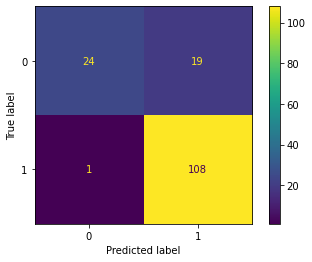

In [34]:
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,rfr.predict(X_test)))
print("F1 Score: ",f1_score(y_test,rfr.predict(X_test)))
print("Precision: ",precision_score(y_test,rfr.predict(X_test)))
print("Recall (Sensistivity): ",recall_score(y_test,rfr.predict(X_test)))


cm=confusion_matrix(y_test,rfr.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
print("Sensitivity: ",tp/(tp+fn))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[06:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.8881578947368421
F1 Score:  0.9276595744680851
Precision:  0.8650793650793651
Recall (Sensitivity):  1.0
Specificity:  0.6046511627906976


C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



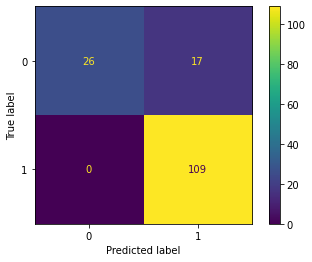

In [35]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print("Accuracy: ",accuracy_score(y_test,xgb.predict(X_test)))
print("F1 Score: ",f1_score(y_test,xgb.predict(X_test)))
print("Precision: ",precision_score(y_test,xgb.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,xgb.predict(X_test)))


cm=confusion_matrix(y_test,xgb.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


Accuracy:  0.875
F1 Score:  0.9177489177489178
Precision:  0.8688524590163934
Recall (Sensitivity):  0.9724770642201835
Specificity:  0.627906976744186


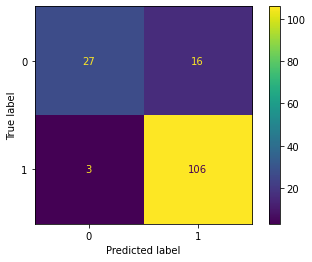

In [36]:
ebm=ExplainableBoostingClassifier()
ebm.fit(X_train,y_train)

print("Accuracy: ",accuracy_score(y_test,ebm.predict(X_test)))
print("F1 Score: ",f1_score(y_test,ebm.predict(X_test)))
print("Precision: ",precision_score(y_test,ebm.predict(X_test)))
print("Recall (Sensitivity): ",recall_score(y_test,ebm.predict(X_test)))


cm=confusion_matrix(y_test,ebm.predict(X_test))

tn=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tp=cm[1][1]

print("Specificity: ",tn/(tn+fp))
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [37]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/2096773947648/ -->

In [38]:
preprocessed

,id,stdDevPeriodPulses,locAbsJitter,rapJitter,ddpJitter,locDbShimmer,GQ_std_cycle_open,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,0.000087,0.000018,0.00067,0.00200,0.517,11.7245,2.48740,0.02292,0.55527,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,0.000073,0.000016,0.00052,0.00157,0.502,13.8284,2.89860,-0.46733,0.45984,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,0.000060,0.000015,0.00057,0.00171,0.897,26.9273,3.22080,-0.48228,0.28918,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0.000183,0.000046,0.00149,0.00446,0.527,139.5744,3.10230,0.75419,-1.55900,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0.002669,0.000044,0.00166,0.00499,0.497,102.0549,2.94510,0.83210,-1.75500,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0.000052,0.000003,0.00008,0.00024,0.171,58.5451,-1.97830,-1.33790,-2.11040,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0.000220,0.000006,0.00016,0.00047,0.482,14.5816,-1.45210,-0.75819,-1.64890,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0.000103,0.000004,0.00011,0.00034,0.263,6.6615,-1.13730,-0.25013,-1.13190,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0.000055,0.000005,0.00017,0.00052,0.311,6.2636,-0.17925,-0.40934,-0.22750,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [39]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


## RFR:

**Before preprocessing:** <br> 

Accuracy:  0.868421052631579 <br>
F1 Score:  0.9159663865546219 <br>
Precision:  0.8790322580645161 <br>
Recall (Sensitivity):  0.956140350877193 <br>
Specificity:  0.6052631578947368 <br>

**After Preprocessing:**<br>

Accuracy:  0.9144736842105263 <br>
F1 Score:  0.9473684210526315 <br>
Precision:  0.936 <br>
Recall (Sensistivity):  0.9590163934426229 <br>
Specificity:  0.7333333333333333 <br>
Sensitivity:  0.9590163934426229 <br>


## XGB:

**Before preprocessing:** <br>

Accuracy:  0.8618421052631579 <br>
F1 Score:  0.9106382978723405 <br>
Precision:  0.8842975206611571 <br>
Recall (Sensitivity):  0.9385964912280702 <br>
Specificity:  0.631578947368421 <br>


**After Preprocessing:** <br>
Accuracy:  0.9013157894736842 <br>
F1 Score:  0.9397590361445783 <br>
Precision:  0.9212598425196851 <br>
Recall (Sensitivity):  0.9590163934426229 <br>
Specificity:  0.6666666666666666 <br>


## EBM: <br>

**Before preprocessing:** <br>

Accuracy:  0.881578947368421 <br>
F1 Score:  0.9256198347107438 <br>
Precision:  0.875 <br>
Recall (Sensitivity):  0.9824561403508771 <br>
Specificity:  0.5789473684210527 <br>

**After preprocessing:**<br>

Accuracy:  0.9078947368421053 <br>
F1 Score:  0.9426229508196722 <br>
Precision:  0.9426229508196722 <br>
Recall (Sensitivity):  0.9426229508196722 <br>
Specificity:  0.7666666666666667 <br>


In [40]:
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
import warnings

In [41]:
warnings.filterwarnings('ignore')
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy = []
precision = []
recall = []
f1 = []
specificity = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train_fold, y_test_fold = y[list(train_index)], y[list(test_index)]
    xgb.fit(x_train_fold, y_train_fold)
    accuracy.append(accuracy_score(y_test_fold,xgb.predict(x_test_fold)))
    f1.append(f1_score(y_test_fold,xgb.predict(x_test_fold)))
    precision.append(precision_score(y_test_fold,xgb.predict(x_test_fold)))
    cm=confusion_matrix(y_test_fold,xgb.predict(x_test_fold))
    specificity.append(cm[0][0]/(cm[0][0]+cm[0][1]))
    recall.append(recall_score(y_test_fold,xgb.predict(x_test_fold)))


print("Accuracy: ",mean(accuracy))
print("F1 Score: ",mean(f1))
print("Precision: ",mean(precision))
print("Recall (Sensitivity): ",mean(recall))
print("Specificity: ",mean(specificity))

[06:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
warnings.filterwarnings('ignore')
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy = []
precision = []
recall = []
f1 = []
specificity = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train_fold, y_test_fold = y[list(train_index)], y[list(test_index)]
    rfr.fit(x_train_fold, y_train_fold)
    accuracy.append(accuracy_score(y_test_fold,rfr.predict(x_test_fold)))
    f1.append(f1_score(y_test_fold,rfr.predict(x_test_fold)))
    precision.append(precision_score(y_test_fold,rfr.predict(x_test_fold)))
    cm=confusion_matrix(y_test_fold,rfr.predict(x_test_fold))
    specificity.append(cm[0][0]/(cm[0][0]+cm[0][1]))
    recall.append(recall_score(y_test_fold,rfr.predict(x_test_fold)))


print("Accuracy: ",mean(accuracy))
print("F1 Score: ",mean(f1))
print("Precision: ",mean(precision))
print("Recall (Sensitivity): ",mean(recall))
print("Specificity: ",mean(specificity))

Accuracy:  0.8824035087719299
F1 Score:  0.925207971875704
Precision:  0.88242345023077
Recall (Sensitivity):  0.9733082706766918
Specificity:  0.6142105263157894


In [43]:
warnings.filterwarnings('ignore')
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy = []
precision = []
recall = []
f1 = []
specificity = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    x_train_fold, x_test_fold = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train_fold, y_test_fold = y[list(train_index)], y[list(test_index)]
    ebm.fit(x_train_fold, y_train_fold)
    accuracy.append(accuracy_score(y_test_fold,ebm.predict(x_test_fold)))
    f1.append(f1_score(y_test_fold,ebm.predict(x_test_fold)))
    precision.append(precision_score(y_test_fold,ebm.predict(x_test_fold)))
    cm=confusion_matrix(y_test_fold,ebm.predict(x_test_fold))
    specificity.append(cm[0][0]/(cm[0][0]+cm[0][1]))
    recall.append(recall_score(y_test_fold,ebm.predict(x_test_fold)))


print("Accuracy: ",mean(accuracy))
print("F1 Score: ",mean(f1))
print("Precision: ",mean(precision))
print("Recall (Sensitivity): ",mean(recall))
print("Specificity: ",mean(specificity))

Accuracy:  0.8863508771929824
F1 Score:  0.9266850613985529
Precision:  0.8928192787288196
Recall (Sensitivity):  0.9644423558897243
Specificity:  0.6557894736842105


In [87]:
from sko.ACA import ACA_TSP


In [61]:
from sko.AFSA import AFSA

In [105]:
c=0

In [106]:
def objective_function(columns):
    global c
    model=XGBClassifier(n_estimators=100,learning_rate=abs(columns[0]))
    model.fit(X_train,y_train,eval_metric='error')
    recall=recall_score(y_test,model.predict(X_test))
    print(c,1-recall)
    c+=1
    return 1-recall

In [107]:

afsa = AFSA(objective_function, n_dim=1, size_pop=50, max_iter=1,
            max_try_num=2, step=1, visual=1,
            q=0.98, delta=1)
best_x, best_y = afsa.run()
print(best_x, best_y)


0 0.05785123966942152
1 0.05785123966942152
2 0.1074380165289256
3 0.0826446280991735
4 0.03305785123966942
5 0.04958677685950408
6 0.04958677685950408
7 0.024793388429752095
8 0.09917355371900827
9 0.05785123966942152
10 0.07438016528925617
11 0.04958677685950408
12 0.06611570247933884
13 0.05785123966942152
14 0.07438016528925617
15 0.04132231404958675
16 0.06611570247933884
17 0.04958677685950408
18 0.04132231404958675
19 0.05785123966942152
20 0.06611570247933884
21 0.05785123966942152
22 0.04958677685950408
23 0.05785123966942152
24 0.04132231404958675
25 0.0826446280991735
26 0.04132231404958675
27 0.07438016528925617
28 0.0826446280991735
29 0.06611570247933884
30 0.07438016528925617
31 0.0826446280991735
32 0.06611570247933884
33 0.0826446280991735
34 0.04958677685950408
35 0.06611570247933884
36 0.07438016528925617
37 0.04132231404958675
38 0.06611570247933884
39 0.06611570247933884
40 0.04958677685950408
41 0.09917355371900827
42 0.05785123966942152
43 0.06611570247933884
44 

348 0.11570247933884292
349 0.04132231404958675
350 0.09090909090909094
351 0.14049586776859502
352 0.1074380165289256
353 0.06611570247933884
354 0.0826446280991735
355 0.04958677685950408
356 0.11570247933884292
357 0.024793388429752095
358 0.09917355371900827
359 0.05785123966942152
360 0.07438016528925617
361 0.04958677685950408
362 0.06611570247933884
363 0.07438016528925617
364 0.04132231404958675
365 0.06611570247933884
366 0.04132231404958675
367 0.06611570247933884
368 0.04958677685950408
369 0.05785123966942152
370 0.04132231404958675
371 0.0826446280991735
372 0.07438016528925617
373 0.0826446280991735
374 0.06611570247933884
375 0.07438016528925617
376 0.0826446280991735
377 0.06611570247933884
378 0.0826446280991735
379 0.04958677685950408
380 0.06611570247933884
381 0.07438016528925617
382 0.04132231404958675
383 0.06611570247933884
384 0.09917355371900827
385 0.06611570247933884
386 0.06611570247933884
387 0.04132231404958675
388 0.05785123966942152
389 0.041322314049586

692 0.0826446280991735
693 0.04958677685950408
694 0.06611570247933884
695 0.07438016528925617
696 0.04132231404958675
697 0.06611570247933884
698 0.06611570247933884
699 0.04958677685950408
700 0.09917355371900827
701 0.05785123966942152
702 0.06611570247933884
703 0.05785123966942152
704 0.06611570247933884
705 0.04132231404958675
706 0.04132231404958675
707 0.05785123966942152
708 0.04132231404958675
709 0.06611570247933884
710 0.1074380165289256
711 0.0826446280991735
712 0.04132231404958675
713 0.05785123966942152
714 0.05785123966942152
715 0.07438016528925617
716 0.04958677685950408
717 0.06611570247933884
718 0.0826446280991735
719 0.04958677685950408
720 0.11570247933884292
721 0.05785123966942152
722 0.04958677685950408
723 0.0826446280991735
724 0.06611570247933884
725 0.03305785123966942
726 0.0826446280991735
727 0.0826446280991735
728 0.07438016528925617
729 0.04132231404958675
730 0.06611570247933884
731 0.04958677685950408
732 0.04132231404958675
733 0.05785123966942152

1035 0.05785123966942152
1036 0.09090909090909094
1037 0.05785123966942152
1038 0.04958677685950408
1039 0.06611570247933884
1040 0.06611570247933884
1041 0.05785123966942152
1042 0.04958677685950408
1043 0.05785123966942152
1044 0.04132231404958675
1045 0.0826446280991735
1046 0.04132231404958675
1047 0.07438016528925617
1048 0.0826446280991735
1049 0.06611570247933884
1050 0.07438016528925617
1051 0.0826446280991735
1052 0.06611570247933884
1053 0.0826446280991735
1054 0.04958677685950408
1055 0.06611570247933884
1056 0.07438016528925617
1057 0.04132231404958675
1058 0.06611570247933884
1059 0.06611570247933884
1060 0.04958677685950408
1061 0.09917355371900827
1062 0.05785123966942152
1063 0.06611570247933884
1064 0.05785123966942152
1065 0.06611570247933884
1066 0.04132231404958675
1067 0.04132231404958675
1068 0.05785123966942152
1069 0.04132231404958675
1070 0.07438016528925617
1071 0.04132231404958675
1072 0.09917355371900827
1073 0.04958677685950408
1074 0.05785123966942152
1075

1366 0.0826446280991735
1367 0.06611570247933884
1368 0.07438016528925617
1369 0.0826446280991735
1370 0.06611570247933884
1371 0.0826446280991735
1372 0.04958677685950408
1373 0.06611570247933884
1374 0.07438016528925617
1375 0.04132231404958675
1376 0.06611570247933884
1377 0.06611570247933884
1378 0.04958677685950408
1379 0.09917355371900827
1380 0.05785123966942152
1381 0.06611570247933884
1382 0.05785123966942152
1383 0.06611570247933884
1384 0.04132231404958675
1385 0.04132231404958675
1386 0.05785123966942152
1387 0.04132231404958675
1388 0.1322314049586777
1389 0.0826446280991735
1390 0.03305785123966942
1391 0.04132231404958675
1392 0.07438016528925617
1393 0.09917355371900827
1394 0.1074380165289256
1395 0.04958677685950408
1396 0.05785123966942152
1397 0.04958677685950408
1398 0.03305785123966942
1399 0.05785123966942152
1400 0.04958677685950408
1401 0.03305785123966942
1402 0.06611570247933884
1403 0.04958677685950408
1404 0.05785123966942152
1405 0.05785123966942152
1406 0

1697 0.04958677685950408
1698 0.11570247933884292
1699 0.05785123966942152
1700 0.0826446280991735
1701 0.06611570247933884
1702 0.03305785123966942
1703 0.0826446280991735
1704 0.0826446280991735
1705 0.05785123966942152
1706 0.09090909090909094
1707 0.05785123966942152
1708 0.04958677685950408
1709 0.06611570247933884
1710 0.09917355371900827
1711 0.04958677685950408
1712 0.0826446280991735
1713 0.0826446280991735
1714 0.0826446280991735
1715 0.04958677685950408
1716 0.07438016528925617
1717 0.1074380165289256
1718 0.04958677685950408
1719 0.2148760330578512
1720 0.04958677685950408
1721 0.06611570247933884
1722 0.07438016528925617
1723 0.04132231404958675
1724 0.06611570247933884
1725 0.06611570247933884
1726 0.04958677685950408
1727 0.09917355371900827
1728 0.06611570247933884
1729 0.05785123966942152
1730 0.06611570247933884
1731 0.04132231404958675
1732 0.04132231404958675
1733 0.05785123966942152
1734 0.04132231404958675
1735 0.0826446280991735
1736 0.07438016528925617
1737 0.04

2027 0.04958677685950408
2028 0.06611570247933884
2029 0.04958677685950408
2030 0.0826446280991735
2031 0.0826446280991735
2032 0.0826446280991735
2033 0.04958677685950408
2034 0.03305785123966942
2035 0.03305785123966942
2036 0.07438016528925617
2037 0.04958677685950408
2038 0.05785123966942152
2039 0.04132231404958675
2040 0.07438016528925617
2041 0.04958677685950408
2042 0.04132231404958675
2043 0.05785123966942152
2044 0.07438016528925617
2045 0.05785123966942152
2046 0.06611570247933884
2047 0.05785123966942152
2048 0.04132231404958675
2049 0.04132231404958675
2050 0.05785123966942152
2051 0.04132231404958675
2052 0.04958677685950408
2053 0.05785123966942152
2054 0.07438016528925617
2055 0.12396694214876036
2056 0.06611570247933884
2057 0.07438016528925617
2058 0.04958677685950408
2059 0.06611570247933884
2060 0.0826446280991735
2061 0.04958677685950408
2062 0.11570247933884292
2063 0.05785123966942152
2064 0.0826446280991735
2065 0.06611570247933884
2066 0.03305785123966942
2067 

2358 0.09917355371900827
2359 0.04132231404958675
2360 0.07438016528925617
2361 0.04132231404958675
2362 0.07438016528925617
2363 0.05785123966942152
2364 0.0826446280991735
2365 0.04958677685950408
2366 0.06611570247933884
2367 0.0826446280991735
2368 0.04958677685950408
2369 0.11570247933884292
2370 0.05785123966942152
2371 0.04958677685950408
2372 0.0826446280991735
2373 0.06611570247933884
2374 0.03305785123966942
2375 0.0826446280991735
2376 0.0826446280991735
2377 0.05785123966942152
2378 0.05785123966942152
2379 0.09090909090909094
2380 0.05785123966942152
2381 0.04958677685950408
2382 0.06611570247933884
2383 0.09917355371900827
2384 0.04958677685950408
2385 0.0826446280991735
2386 0.0826446280991735
2387 0.0826446280991735
2388 0.04958677685950408
2389 0.07438016528925617
2390 0.1074380165289256
2391 0.04958677685950408
2392 0.05785123966942152
2393 0.07438016528925617
2394 0.09917355371900827
2395 0.14049586776859502
2396 0.04958677685950408
2397 0.04132231404958675
2398 0.05

In [124]:

model=XGBClassifier(n_estimators=250,learning_rate=0.11629655,eval_metric='logloss',booster='dart')

0
1
2
3
4
5
6
7
8
9
Accuracy:  0.890280701754386
F1 Score:  0.9295616847817187
Precision:  0.8951778384361233
Recall (Sensitivity):  0.9679824561403508
Specificity:  0.6602631578947369


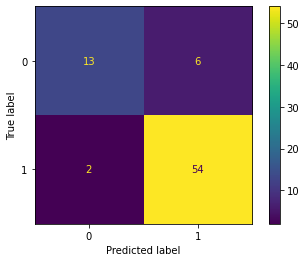

In [156]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy = []
precision = []
recall = []
f1 = []
specificity = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    print(i)
    x_train_fold, x_test_fold = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train_fold, y_test_fold = y[list(train_index)], y[list(test_index)]
    model.fit(x_train_fold, y_train_fold)
    accuracy.append(accuracy_score(y_test_fold,model.predict(x_test_fold)))
    f1.append(f1_score(y_test_fold,model.predict(x_test_fold)))
    precision.append(precision_score(y_test_fold,model.predict(x_test_fold)))
    cm=confusion_matrix(y_test_fold,model.predict(x_test_fold))
    specificity.append(cm[0][0]/(cm[0][0]+cm[0][1]))
    recall.append(recall_score(y_test_fold,model.predict(x_test_fold)))


print("Accuracy: ",mean(accuracy))
print("F1 Score: ",mean(f1))
print("Precision: ",mean(precision))
print("Recall (Sensitivity): ",mean(recall))
print("Specificity: ",mean(specificity))

disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [147]:
c=0
def objective_function(columns):
    global c
    model=RandomForestClassifier(n_estimators=max(50,int(100*abs(columns[0]))),ccp_alpha=min(abs(columns[1]),0.5),min_weight_fraction_leaf=min(0.5,abs(columns[2])))
    model.fit(X_train,y_train)
    recall=recall_score(y_test,model.predict(X_test))
    print(c,1-recall)
    c+=1
    return 1-recall

In [148]:
afsa = AFSA(objective_function, n_dim=3, size_pop=50, max_iter=1,
            max_try_num=2, step=1, visual=1,
            q=0.98, delta=1)
best_x, best_y = afsa.run()
print(best_x, best_y)


0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 0.

1029 0.0
1030 0.0
1031 0.0
1032 0.0
1033 0.0
1034 0.0
1035 0.0
1036 0.0
1037 0.0
1038 0.0
1039 0.0
1040 0.0
1041 0.0
1042 0.0
1043 0.0
1044 0.0
1045 0.0
1046 0.0
1047 0.0
1048 0.0
1049 0.0
1050 0.0
1051 0.0
1052 0.0
1053 0.0
1054 0.0
1055 0.0
1056 0.0
1057 0.0
1058 0.0
1059 0.0
1060 0.0
1061 0.0
1062 0.0
1063 0.0
1064 0.0
1065 0.0
1066 0.0
1067 0.0
1068 0.0
1069 0.0
1070 0.0
1071 0.0
1072 0.0
1073 0.0
1074 0.0
1075 0.0
1076 0.0
1077 0.0
1078 0.0
1079 0.024793388429752095
1080 0.0
1081 0.0
1082 0.0
1083 0.0
1084 0.0
1085 0.0
1086 0.0
1087 0.0
1088 0.0
1089 0.0
1090 0.0
1091 0.0
1092 0.0
1093 0.0
1094 0.0
1095 0.0
1096 0.0
1097 0.0
1098 0.0
1099 0.0
1100 0.0
1101 0.0
1102 0.0
1103 0.0
1104 0.0
1105 0.0
1106 0.0
1107 0.0
1108 0.0
1109 0.0
1110 0.0
1111 0.0
1112 0.0
1113 0.0
1114 0.0
1115 0.0
1116 0.008264462809917328
1117 0.0
1118 0.0
1119 0.0
1120 0.0
1121 0.0
1122 0.0
1123 0.0
1124 0.0
1125 0.0
1126 0.0
1127 0.0
1128 0.0
1129 0.0
1130 0.0
1131 0.0
1132 0.0
1133 0.0
1134 0.0
1135 0.0
[ 2

In [151]:
model2=RandomForestClassifier(n_estimators=281,ccp_alpha=0.5,min_weight_fraction_leaf=0.5)

In [153]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy = []
precision = []
recall = []
f1 = []
specificity = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    print(i)
    x_train_fold, x_test_fold = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train_fold, y_test_fold = y[list(train_index)], y[list(test_index)]
    model2.fit(x_train_fold, y_train_fold)
    accuracy.append(accuracy_score(y_test_fold,model2.predict(x_test_fold)))
    f1.append(f1_score(y_test_fold,model2.predict(x_test_fold)))
    precision.append(precision_score(y_test_fold,model2.predict(x_test_fold)))
    cm=confusion_matrix(y_test_fold,model2.predict(x_test_fold))
    specificity.append(cm[0][0]/(cm[0][0]+cm[0][1]))
    recall.append(recall_score(y_test_fold,model2.predict(x_test_fold)))


print("Accuracy: ",mean(accuracy))
print("F1 Score: ",mean(f1))
print("Precision: ",mean(precision))
print("Recall (Sensitivity): ",mean(recall))
print("Specificity: ",mean(specificity))

0
1
2
3
4
5
6
7
8
9
Accuracy:  0.7460350877192983
F1 Score:  0.8545388453785401
Precision:  0.7460350877192983
Recall (Sensitivity):  1.0
Specificity:  0.0


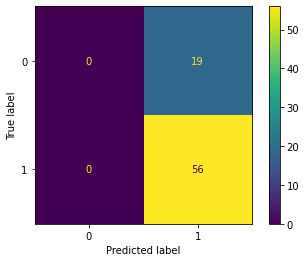

In [155]:
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [158]:
model3=ExplainableBoostingClassifier(learning_rate=0.11)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy = []
precision = []
recall = []
f1 = []
specificity = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    print(i)
    x_train_fold, x_test_fold = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train_fold, y_test_fold = y[list(train_index)], y[list(test_index)]
    model3.fit(x_train_fold, y_train_fold)
    accuracy.append(accuracy_score(y_test_fold,model3.predict(x_test_fold)))
    f1.append(f1_score(y_test_fold,model3.predict(x_test_fold)))
    precision.append(precision_score(y_test_fold,model3.predict(x_test_fold)))
    cm=confusion_matrix(y_test_fold,model3.predict(x_test_fold))
    specificity.append(cm[0][0]/(cm[0][0]+cm[0][1]))
    recall.append(recall_score(y_test_fold,model3.predict(x_test_fold)))


print("Accuracy: ",mean(accuracy))
print("F1 Score: ",mean(f1))
print("Precision: ",mean(precision))
print("Recall (Sensitivity): ",mean(recall))
print("Specificity: ",mean(specificity))

0
1
2
3
4
5
6
7
8
9
Accuracy:  0.8903157894736842
F1 Score:  0.9290917611558438
Precision:  0.8988577383838843
Recall (Sensitivity):  0.96265664160401
Specificity:  0.6765789473684211


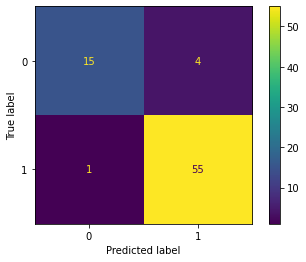

In [159]:
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
